#Desafio do módulo 1 referente ao tratamento dos dados de clustering do plano de saúde

1. Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Trazendo base de dados

In [45]:
df_clientes = pd.read_excel('/content/dados_clientes.xlsx')
df_estados = pd.read_csv('/content/estados_brasileiros.csv',encoding='latin-1',sep=';')
df_idade = pd.read_csv('/content/idade_clientes.csv',sep=';')

3. Juntando base de dados e fazendo alguns tratamentos, como mudança de atributos nominais para inteiros e mudança nos id dos estados para os nomes dos estados

In [3]:
df = pd.merge(df_clientes,df_idade,how = 'outer')
df.loc[df.genero == 'Masculino','genero'] = 1
df.loc[df.genero == "Feminino","genero"] = 0
estados = df_estados.estado.values
count = 1
for x in estados:
  df.loc[df.id_estado == count,"id_estado"] = x
  count+=1

4. Verificando a existencia de valores nulos, e dropando se tiver

In [4]:
print(df.isnull().sum())
print(df.isna().sum())
df = df.dropna()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
idade         0
dtype: int64
id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
idade         0
dtype: int64


5. Realizando um mapa de calor para ver as variaveis que mais influenciam 

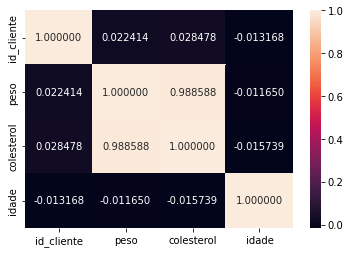

In [5]:
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(corr, annot=True, fmt="f")

6. Deixando as variáveis que mais influenciam e exlcluindo as outras

In [6]:
df_2 = df.loc[:,['colesterol','peso']]

7. Analisando a correlação das variaveis

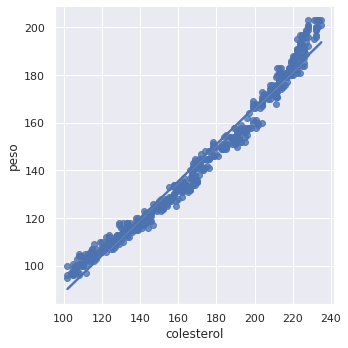

In [7]:
import seaborn as sns; sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
g = sns.lmplot(x="colesterol", y="peso", data=df_2)

### Percebendo que existe uma forte correlação do peso com o colesterol, podemos criar um modelo de regressão linear para poder predizer o valores faltantes 

8. Vendo onde estão os valores nulos

In [8]:
df_clientes.isnull().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

9. Com os valores nulos localizados, vou criar um modelo de regressão para poder preencher os dados vazios

In [9]:
y = df_2['peso']
x = df_2['colesterol']
input = list()
for input_colesterol in x:
  input.append([input_colesterol])
outp = list()
for outp_ in y:
  outp.append(outp_)

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(input, outp)

In [11]:
df_clientes.loc[df_clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


10. Automatizando o processo de encontrar o valor nulo, colocar ele no preditor e depois substituir

In [12]:
g = df_clientes.loc[df_clientes['peso'].isnull()].values
g = g.tolist()
for x in g:
  p = reg.predict([[x[2]]])[0]
  df_clientes.loc[df_clientes.id_cliente == x[0], 'peso'] = p

11. As 3 proximas células são apenas uma reconstrução dos passos 1 a 6 mas agora com os valores que antes estavam ausentes, presentes.

In [13]:
df = pd.merge(df_clientes,df_idade,how = 'outer')
df.loc[df.genero == 'Masculino','genero'] = 1
df.loc[df.genero == "Feminino","genero"] = 0
estados = df_estados.estado.values
count = 1
for x in estados:
  df.loc[df.id_estado == count,"id_estado"] = x
  count+=1

In [14]:
print(df.isnull().sum())

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
idade         0
dtype: int64


In [15]:
df_2 = df.loc[:,['colesterol','peso']]
df_2.head(5)

,colesterol,peso
0,111,102.0
1,135,115.0
2,136,115.0
3,167,140.0
4,158,130.0


# Com a base de dados pronta, podemos iniciar o processo de clusterização

In [16]:
from sklearn.cluster import KMeans

12. Calcular a melhor quantidade de cluster utilizando WCSS

In [55]:
def calcular_wcss(dados):
  wcss = list()
  for x in range(1,11):
    km = KMeans(n_clusters= x,random_state=0)
    km.fit(dados)
    wcss.append(km.inertia_)
  return wcss

In [56]:
data = df_2[['colesterol','peso']]
wcss = calcular_wcss(data)
tam = list()
for z in range(0,len(wcss)):
  tam.append(z)

13. Mostrar o gráfico do wcss

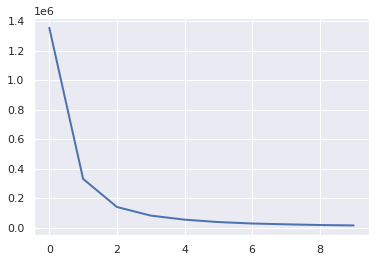

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(tam, wcss,linewidth=2.0)
plt.show()

14. Criar o modelo e inserir na tabela

In [30]:
clientes = KMeans(n_clusters= 4,random_state=0)
df['cluster'] = clientes.fit_predict(data)

In [31]:
df

,id_cliente,peso,colesterol,genero,id_estado,idade,cluster
0,1,102.0,111,1,Roraima,17,0
1,2,115.0,135,1,Distrito Federal,28,0
2,3,115.0,136,1,Amazonas,62,0
3,4,140.0,167,0,Santa Catarina,55,3
4,5,130.0,158,1,Sergipe,44,3
...,...,...,...,...,...,...,...
542,543,172.0,207,1,Rondônia,20,2
543,544,129.0,157,1,Acre,66,3
544,545,107.0,115,1,Ceará,36,0
545,546,117.0,147,1,Rio Grande do Norte,57,3


15. Calcular os centróides dos clusters

In [32]:
centroid = clientes.cluster_centers_
centroid

array([[119.66666667, 106.91489362],
       [186.94117647, 152.91599368],
       [219.31333333, 184.68013763],
       [154.82481752, 128.12567565]])

16. Plotar os gráficos

In [61]:
import plotly.express as px  
import plotly.graph_objects as go

grafico = px.scatter(x=df['colesterol'],y=df['peso'],color=df['cluster'])
grafico_c = px.scatter(x=centroid[:,0],y=centroid[:,1],size=[7,7,7,7])
gr = go.Figure(data = grafico_c.data + grafico.data)
gr.show()

17. Segmentar os clientes

In [38]:
df_final = df
df_final.loc[df_final['cluster']==0,"Grupo"] = "Baixo Risco"
df_final.loc[df_final['cluster']==3,"Grupo"] = "Risco Moderado Baixo"
df_final.loc[df_final['cluster']==1,"Grupo"] = "Risco Moderado Alto"
df_final.loc[df_final['cluster']==2,"Grupo"] = "Alto Risco"

18. Resultado Final

In [39]:
df_final

,id_cliente,peso,colesterol,genero,id_estado,idade,cluster,Grupo
0,1,102.0,111,1,Roraima,17,0,Baixo Risco
1,2,115.0,135,1,Distrito Federal,28,0,Baixo Risco
2,3,115.0,136,1,Amazonas,62,0,Baixo Risco
3,4,140.0,167,0,Santa Catarina,55,3,Risco Moderado Baixo
4,5,130.0,158,1,Sergipe,44,3,Risco Moderado Baixo
...,...,...,...,...,...,...,...,...
542,543,172.0,207,1,Rondônia,20,2,Alto Risco
543,544,129.0,157,1,Acre,66,3,Risco Moderado Baixo
544,545,107.0,115,1,Ceará,36,0,Baixo Risco
545,546,117.0,147,1,Rio Grande do Norte,57,3,Risco Moderado Baixo


19. Analises

In [60]:
df_final.groupby('Grupo')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
Grupo,,,,,,,,
Alto Risco,153.0,184.353076,9.693192,168.0,176.000000,184.0,191.0,203.0
Baixo Risco,141.0,106.914894,6.195032,95.0,102.000000,107.0,112.0,118.0
Risco Moderado Alto,116.0,152.525890,6.919979,140.0,148.000000,152.0,157.0,169.0
Risco Moderado Baixo,137.0,128.125676,7.192864,115.0,122.217564,128.0,134.0,143.0


In [41]:
df_final.groupby('Grupo')['id_estado'].describe()

,count,unique,top,freq
Grupo,,,,
Alto Risco,153,27,Rio Grande do Sul,10
Baixo Risco,141,27,Amazonas,10
Risco Moderado Alto,116,27,Mato Grosso do Sul,7
Risco Moderado Baixo,137,27,Sergipe,9


In [43]:
df_final.query('Grupo == "Alto Risco" & id_estado == "Rio Grande do Sul"')

,id_cliente,peso,colesterol,genero,id_estado,idade,cluster,Grupo
68,69,187.0,221,0,Rio Grande do Sul,35,2,Alto Risco
105,106,179.0,216,1,Rio Grande do Sul,56,2,Alto Risco
260,261,171.0,205,1,Rio Grande do Sul,34,2,Alto Risco
312,313,169.0,204,1,Rio Grande do Sul,33,2,Alto Risco
334,335,182.0,222,1,Rio Grande do Sul,68,2,Alto Risco
372,373,194.0,224,0,Rio Grande do Sul,38,2,Alto Risco
373,374,177.0,214,1,Rio Grande do Sul,18,2,Alto Risco
375,376,172.0,205,1,Rio Grande do Sul,50,2,Alto Risco
402,403,175.0,215,0,Rio Grande do Sul,45,2,Alto Risco
408,409,180.0,219,1,Rio Grande do Sul,19,2,Alto Risco


In [63]:
df_final.groupby(['Grupo','genero'])['peso'].describe()

count        mean        std    min     25%  \
Grupo                genero                                                
Alto Risco           0        63.0  186.046048   7.869997  168.0  180.50   
                     1        90.0  183.167996  10.671058  168.0  173.25   
Baixo Risco          0        65.0  108.323077   6.359313   96.0  104.00   
                     1        76.0  105.710526   5.825955   95.0  101.75   
Risco Moderado Alto  0        63.0  152.476190   7.111683  140.0  145.00   
                     1        53.0  152.584967   6.752275  140.0  148.00   
Risco Moderado Baixo 0        75.0  130.122901   7.263788  116.0  125.00   
                     1        62.0  125.709677   6.364314  115.0  120.25   

                               50%     75%    max  
Grupo                genero                        
Alto Risco           0       186.0  191.50  203.0  
                     1       181.5  189.75  203.0  
Baixo Risco          0       110.0  113.00  118.0  
                     1       105.0  110.00  118.0  
Risco Moderado Alto  0       154.0  157.50  169.0  
                     1       151.0  154.00  168.0  
Risco Moderado Baixo 0       131.0  136.00  143.0  
                     1       125.5  131.00  140.0